In [1]:
from environments import ZeroDCleanupEnv
import numpy as np
import torch
from agents import UAgent
from tqdm import tqdm

2023-11-25 21:49:22,390	WARNING deprecation.py:50 -- DeprecationWarning: `DirectStepOptimizer` has been deprecated. This will raise an error in the future!


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"cuda available: {torch.cuda.is_available()}")
np.set_printoptions(threshold=np.inf)

cuda available: False


In [3]:
num_agents = 10
reward_multiplier = 10

# for printing options
pp = False
verbose = False
verbose_episode = 200  # start printing at which epoch

In [4]:
thresholdDepletion = 0.4
thresholdRestoration = 0.0
wasteSpawnProbability = 0.5
appleRespawnProbability = 0.05
dirt_multiplier = 10
division_ep = 1e-7

In [5]:
gamma = 0.999
epsilon = 1.0
epsilon_decay = 0.99998
epsilon_min = 0.05
lr = 0.0001
batch_size = 64

In [6]:
num_agents = 10
agent_ids = [str(i) for i in range(num_agents)]

In [7]:
state_dim = 2
action_dim = 2

In [8]:
env = ZeroDCleanupEnv(agent_ids=agent_ids, 
                      num_agents=10, 
                      thresholdDepletion=thresholdDepletion,
                        thresholdRestoration=thresholdRestoration,
                        wasteSpawnProbability=wasteSpawnProbability,
                        appleRespawnProbability=appleRespawnProbability,
                        dirt_multiplier=dirt_multiplier,
                        area=150)

agentCoordinator = UAgent(device=device,
                          num_action_outputs=num_agents,
                          action_size=action_dim,
                          buffer_size=1000,
                          batch_size=batch_size,
                          lr=lr,
                          gamma=gamma,
                          epsilon=epsilon,
                          epsilon_decay=epsilon_decay,
                          epsilon_min=epsilon_min,
                          u_layers=[
                              (state_dim, 32),
                              (32, 32),
                              (32, 16),
                              (16, 1)
                          ])

In [9]:
ending_ep_rewards = []
num_episodes = 200
num_steps_per_epsiode = 1000

In [10]:
for episode in range(num_episodes):
    print(f"========= Episode {episode} =========")

    states, info = env.reset()
    #states = np.concatenate(list(states.values()), axis=0)
    state = states[agent_ids[0]]
    num_apples, num_dirt, _, _ = state
    state = np.array([num_apples, num_dirt])

    print(f"info: {info}")

    for step in tqdm(range(num_steps_per_epsiode)):
        actions_list = agentCoordinator.act(env)[0]
        actions = {agent_id: actions_list[i] for i, agent_id in enumerate(agent_ids)}
        next_states, rewards, dones, _, info = env.step(actions)
        #next_states = np.concatenate(list(next_states.values()), axis=0)
        next_state = next_states[agent_ids[0]]
        num_apples, num_dirt, _, _ = next_state
        next_state = np.array([num_apples, num_dirt])
        reward = sum(rewards.values())
        #reward_graph.append(reward)
        agentCoordinator.step(state, reward, next_state)

        if episode > verbose_episode:
            print(f"========= Step {step} =========")
            print(f"info: {info}")

        state = next_state

        if dones["__all__"]:
            break 

    ending_reward = info["total_apple_consumed"]

    print(f"ending reward: {ending_reward}")
    #print(f"reward graph: {reward_graph}")
    print(f"========= End of Episode {episode} =========")

    ending_ep_rewards.append(ending_reward)

    

#torch.save(agentCoordinator.q_network.state_dict(), "results/q_simple_" + str(test_id) + "/q_network.pt")

        

========= Episode 0 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


 13%|█▎        | 126/1000 [00:00<00:00, 1250.12it/s]

100%|█████████▉| 999/1000 [00:00<00:00, 1217.99it/s]


ending reward: 2574
========= End of Episode 0 =========
========= Episode 1 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 939.62it/s] 


ending reward: 2569
========= End of Episode 1 =========
========= Episode 2 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 864.53it/s]


ending reward: 2692
========= End of Episode 2 =========
========= Episode 3 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 849.24it/s]


ending reward: 2620
========= End of Episode 3 =========
========= Episode 4 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 721.38it/s]


ending reward: 2626
========= End of Episode 4 =========
========= Episode 5 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 657.15it/s]


ending reward: 2673
========= End of Episode 5 =========
========= Episode 6 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 594.34it/s]


ending reward: 2724
========= End of Episode 6 =========
========= Episode 7 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 611.94it/s]


ending reward: 2754
========= End of Episode 7 =========
========= Episode 8 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 507.75it/s]


ending reward: 2626
========= End of Episode 8 =========
========= Episode 9 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:01<00:00, 545.03it/s]


ending reward: 2573
========= End of Episode 9 =========
========= Episode 10 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 469.73it/s]


ending reward: 2717
========= End of Episode 10 =========
========= Episode 11 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 420.35it/s]


ending reward: 2733
========= End of Episode 11 =========
========= Episode 12 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 414.90it/s]


ending reward: 2605
========= End of Episode 12 =========
========= Episode 13 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 376.69it/s]


ending reward: 2733
========= End of Episode 13 =========
========= Episode 14 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 363.58it/s]


ending reward: 2768
========= End of Episode 14 =========
========= Episode 15 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 366.93it/s]


ending reward: 2719
========= End of Episode 15 =========
========= Episode 16 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:02<00:00, 337.27it/s]


ending reward: 2713
========= End of Episode 16 =========
========= Episode 17 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:03<00:00, 327.05it/s]


ending reward: 2688
========= End of Episode 17 =========
========= Episode 18 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:03<00:00, 311.98it/s]


ending reward: 2647
========= End of Episode 18 =========
========= Episode 19 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:03<00:00, 312.09it/s]


ending reward: 2666
========= End of Episode 19 =========
========= Episode 20 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:03<00:00, 314.11it/s]


ending reward: 2659
========= End of Episode 20 =========
========= Episode 21 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:03<00:00, 282.79it/s]


ending reward: 2772
========= End of Episode 21 =========
========= Episode 22 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:03<00:00, 269.70it/s]


ending reward: 2575
========= End of Episode 22 =========
========= Episode 23 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:04<00:00, 216.45it/s]


ending reward: 2628
========= End of Episode 23 =========
========= Episode 24 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:04<00:00, 245.63it/s]


ending reward: 2636
========= End of Episode 24 =========
========= Episode 25 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:03<00:00, 259.86it/s]


ending reward: 2736
========= End of Episode 25 =========
========= Episode 26 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:03<00:00, 257.59it/s]


ending reward: 2702
========= End of Episode 26 =========
========= Episode 27 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:03<00:00, 250.66it/s]


ending reward: 2582
========= End of Episode 27 =========
========= Episode 28 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:04<00:00, 233.63it/s]


ending reward: 2562
========= End of Episode 28 =========
========= Episode 29 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:04<00:00, 226.92it/s]


ending reward: 2438
========= End of Episode 29 =========
========= Episode 30 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:04<00:00, 247.37it/s]


ending reward: 2592
========= End of Episode 30 =========
========= Episode 31 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:04<00:00, 234.54it/s]


ending reward: 2342
========= End of Episode 31 =========
========= Episode 32 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:04<00:00, 216.06it/s]


ending reward: 2603
========= End of Episode 32 =========
========= Episode 33 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:04<00:00, 220.57it/s]


ending reward: 2520
========= End of Episode 33 =========
========= Episode 34 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:04<00:00, 240.32it/s]


ending reward: 2612
========= End of Episode 34 =========
========= Episode 35 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:04<00:00, 221.95it/s]


ending reward: 2312
========= End of Episode 35 =========
========= Episode 36 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:04<00:00, 206.10it/s]


ending reward: 2490
========= End of Episode 36 =========
========= Episode 37 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:04<00:00, 219.41it/s]


ending reward: 2293
========= End of Episode 37 =========
========= Episode 38 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:04<00:00, 216.27it/s]


ending reward: 2373
========= End of Episode 38 =========
========= Episode 39 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:04<00:00, 206.08it/s]


ending reward: 2521
========= End of Episode 39 =========
========= Episode 40 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:04<00:00, 212.18it/s]


ending reward: 2519
========= End of Episode 40 =========
========= Episode 41 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:05<00:00, 198.51it/s]


ending reward: 2331
========= End of Episode 41 =========
========= Episode 42 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:05<00:00, 198.37it/s]


ending reward: 2255
========= End of Episode 42 =========
========= Episode 43 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:05<00:00, 192.22it/s]


ending reward: 2340
========= End of Episode 43 =========
========= Episode 44 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:05<00:00, 185.52it/s]


ending reward: 2509
========= End of Episode 44 =========
========= Episode 45 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:04<00:00, 202.92it/s]


ending reward: 2400
========= End of Episode 45 =========
========= Episode 46 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:05<00:00, 187.43it/s]


ending reward: 2176
========= End of Episode 46 =========
========= Episode 47 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:05<00:00, 188.14it/s]


ending reward: 2340
========= End of Episode 47 =========
========= Episode 48 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:06<00:00, 163.82it/s]


ending reward: 2234
========= End of Episode 48 =========
========= Episode 49 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:05<00:00, 185.23it/s]


ending reward: 2356
========= End of Episode 49 =========
========= Episode 50 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:05<00:00, 184.41it/s]


ending reward: 2135
========= End of Episode 50 =========
========= Episode 51 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:05<00:00, 178.57it/s]


ending reward: 2150
========= End of Episode 51 =========
========= Episode 52 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:05<00:00, 180.58it/s]


ending reward: 2129
========= End of Episode 52 =========
========= Episode 53 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:05<00:00, 182.55it/s]


ending reward: 2149
========= End of Episode 53 =========
========= Episode 54 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:05<00:00, 183.18it/s]


ending reward: 2143
========= End of Episode 54 =========
========= Episode 55 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:05<00:00, 174.60it/s]


ending reward: 2016
========= End of Episode 55 =========
========= Episode 56 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:05<00:00, 179.65it/s]


ending reward: 2232
========= End of Episode 56 =========
========= Episode 57 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:05<00:00, 175.39it/s]


ending reward: 2289
========= End of Episode 57 =========
========= Episode 58 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:05<00:00, 174.70it/s]


ending reward: 2249
========= End of Episode 58 =========
========= Episode 59 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:06<00:00, 165.09it/s]


ending reward: 2253
========= End of Episode 59 =========
========= Episode 60 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:05<00:00, 171.09it/s]


ending reward: 2179
========= End of Episode 60 =========
========= Episode 61 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:05<00:00, 171.69it/s]


ending reward: 2116
========= End of Episode 61 =========
========= Episode 62 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:06<00:00, 166.05it/s]


ending reward: 2196
========= End of Episode 62 =========
========= Episode 63 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:06<00:00, 163.60it/s]


ending reward: 2111
========= End of Episode 63 =========
========= Episode 64 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:06<00:00, 161.99it/s]


ending reward: 2059
========= End of Episode 64 =========
========= Episode 65 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:06<00:00, 164.42it/s]


ending reward: 2176
========= End of Episode 65 =========
========= Episode 66 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:06<00:00, 162.97it/s]


ending reward: 2074
========= End of Episode 66 =========
========= Episode 67 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:06<00:00, 164.41it/s]


ending reward: 2113
========= End of Episode 67 =========
========= Episode 68 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:06<00:00, 161.07it/s]


ending reward: 2145
========= End of Episode 68 =========
========= Episode 69 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:06<00:00, 149.37it/s]


ending reward: 2024
========= End of Episode 69 =========
========= Episode 70 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:06<00:00, 157.52it/s]


ending reward: 1960
========= End of Episode 70 =========
========= Episode 71 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:06<00:00, 159.21it/s]


ending reward: 2068
========= End of Episode 71 =========
========= Episode 72 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:06<00:00, 158.00it/s]


ending reward: 2014
========= End of Episode 72 =========
========= Episode 73 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:06<00:00, 152.03it/s]


ending reward: 2060
========= End of Episode 73 =========
========= Episode 74 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:06<00:00, 158.00it/s]


ending reward: 1771
========= End of Episode 74 =========
========= Episode 75 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:06<00:00, 157.51it/s]


ending reward: 2062
========= End of Episode 75 =========
========= Episode 76 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:06<00:00, 156.44it/s]


ending reward: 2039
========= End of Episode 76 =========
========= Episode 77 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:06<00:00, 156.31it/s]


ending reward: 1957
========= End of Episode 77 =========
========= Episode 78 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:06<00:00, 147.73it/s]


ending reward: 2075
========= End of Episode 78 =========
========= Episode 79 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:06<00:00, 148.02it/s]


ending reward: 1908
========= End of Episode 79 =========
========= Episode 80 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:06<00:00, 151.83it/s]


ending reward: 1923
========= End of Episode 80 =========
========= Episode 81 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:06<00:00, 154.11it/s]


ending reward: 1895
========= End of Episode 81 =========
========= Episode 82 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 126.91it/s]


ending reward: 1905
========= End of Episode 82 =========
========= Episode 83 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:06<00:00, 145.38it/s]


ending reward: 1567
========= End of Episode 83 =========
========= Episode 84 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:06<00:00, 144.20it/s]


ending reward: 1805
========= End of Episode 84 =========
========= Episode 85 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 139.15it/s]


ending reward: 1581
========= End of Episode 85 =========
========= Episode 86 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:06<00:00, 143.70it/s]


ending reward: 1634
========= End of Episode 86 =========
========= Episode 87 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:06<00:00, 147.08it/s]


ending reward: 1707
========= End of Episode 87 =========
========= Episode 88 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:06<00:00, 148.75it/s]


ending reward: 1723
========= End of Episode 88 =========
========= Episode 89 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:06<00:00, 146.07it/s]


ending reward: 1882
========= End of Episode 89 =========
========= Episode 90 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:06<00:00, 146.69it/s]


ending reward: 1782
========= End of Episode 90 =========
========= Episode 91 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:06<00:00, 150.04it/s]


ending reward: 1831
========= End of Episode 91 =========
========= Episode 92 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:06<00:00, 146.96it/s]


ending reward: 1788
========= End of Episode 92 =========
========= Episode 93 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:06<00:00, 146.71it/s]


ending reward: 1955
========= End of Episode 93 =========
========= Episode 94 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:06<00:00, 143.21it/s]


ending reward: 1798
========= End of Episode 94 =========
========= Episode 95 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 137.46it/s]


ending reward: 1845
========= End of Episode 95 =========
========= Episode 96 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:06<00:00, 146.05it/s]


ending reward: 1804
========= End of Episode 96 =========
========= Episode 97 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 141.63it/s]


ending reward: 1573
========= End of Episode 97 =========
========= Episode 98 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 138.83it/s]


ending reward: 1699
========= End of Episode 98 =========
========= Episode 99 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:06<00:00, 144.33it/s]


ending reward: 1737
========= End of Episode 99 =========
========= Episode 100 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:06<00:00, 147.56it/s]


ending reward: 1846
========= End of Episode 100 =========
========= Episode 101 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:06<00:00, 142.91it/s]


ending reward: 1600
========= End of Episode 101 =========
========= Episode 102 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 141.08it/s]


ending reward: 1647
========= End of Episode 102 =========
========= Episode 103 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 142.46it/s]


ending reward: 1702
========= End of Episode 103 =========
========= Episode 104 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 138.44it/s]


ending reward: 1997
========= End of Episode 104 =========
========= Episode 105 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 137.47it/s]


ending reward: 1853
========= End of Episode 105 =========
========= Episode 106 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 141.20it/s]


ending reward: 1804
========= End of Episode 106 =========
========= Episode 107 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:06<00:00, 143.74it/s]


ending reward: 1635
========= End of Episode 107 =========
========= Episode 108 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 142.35it/s]


ending reward: 1867
========= End of Episode 108 =========
========= Episode 109 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 138.84it/s]


ending reward: 1843
========= End of Episode 109 =========
========= Episode 110 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 140.51it/s]


ending reward: 1888
========= End of Episode 110 =========
========= Episode 111 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:06<00:00, 143.38it/s]


ending reward: 1809
========= End of Episode 111 =========
========= Episode 112 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 140.83it/s]


ending reward: 1679
========= End of Episode 112 =========
========= Episode 113 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 138.43it/s]


ending reward: 1599
========= End of Episode 113 =========
========= Episode 114 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 129.39it/s]


ending reward: 1823
========= End of Episode 114 =========
========= Episode 115 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 128.65it/s]


ending reward: 1740
========= End of Episode 115 =========
========= Episode 116 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 135.35it/s]


ending reward: 1502
========= End of Episode 116 =========
========= Episode 117 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 132.10it/s]


ending reward: 1583
========= End of Episode 117 =========
========= Episode 118 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 138.49it/s]


ending reward: 1709
========= End of Episode 118 =========
========= Episode 119 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 136.26it/s]


ending reward: 1526
========= End of Episode 119 =========
========= Episode 120 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:08<00:00, 115.64it/s]


ending reward: 1763
========= End of Episode 120 =========
========= Episode 121 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 129.74it/s]


ending reward: 1801
========= End of Episode 121 =========
========= Episode 122 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 128.54it/s]


ending reward: 1434
========= End of Episode 122 =========
========= Episode 123 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 131.98it/s]


ending reward: 1565
========= End of Episode 123 =========
========= Episode 124 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 130.83it/s]


ending reward: 1498
========= End of Episode 124 =========
========= Episode 125 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 137.45it/s]


ending reward: 1597
========= End of Episode 125 =========
========= Episode 126 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 133.19it/s]


ending reward: 1709
========= End of Episode 126 =========
========= Episode 127 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 134.81it/s]


ending reward: 1621
========= End of Episode 127 =========
========= Episode 128 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 132.62it/s]


ending reward: 1708
========= End of Episode 128 =========
========= Episode 129 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 132.37it/s]


ending reward: 1818
========= End of Episode 129 =========
========= Episode 130 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 131.25it/s]


ending reward: 1781
========= End of Episode 130 =========
========= Episode 131 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 130.56it/s]


ending reward: 1625
========= End of Episode 131 =========
========= Episode 132 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:08<00:00, 115.35it/s]


ending reward: 1731
========= End of Episode 132 =========
========= Episode 133 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 132.12it/s]


ending reward: 1598
========= End of Episode 133 =========
========= Episode 134 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 134.22it/s]


ending reward: 1488
========= End of Episode 134 =========
========= Episode 135 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 133.46it/s]


ending reward: 1675
========= End of Episode 135 =========
========= Episode 136 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 130.62it/s]


ending reward: 1606
========= End of Episode 136 =========
========= Episode 137 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 129.68it/s]


ending reward: 1830
========= End of Episode 137 =========
========= Episode 138 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 134.37it/s]


ending reward: 1700
========= End of Episode 138 =========
========= Episode 139 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 130.63it/s]


ending reward: 1749
========= End of Episode 139 =========
========= Episode 140 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 127.52it/s]


ending reward: 1740
========= End of Episode 140 =========
========= Episode 141 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 131.54it/s]


ending reward: 1680
========= End of Episode 141 =========
========= Episode 142 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 135.71it/s]


ending reward: 1648
========= End of Episode 142 =========
========= Episode 143 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 132.20it/s]


ending reward: 1753
========= End of Episode 143 =========
========= Episode 144 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 127.94it/s]


ending reward: 1654
========= End of Episode 144 =========
========= Episode 145 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:08<00:00, 120.77it/s]


ending reward: 1539
========= End of Episode 145 =========
========= Episode 146 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 128.60it/s]


ending reward: 1389
========= End of Episode 146 =========
========= Episode 147 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 124.89it/s]


ending reward: 1646
========= End of Episode 147 =========
========= Episode 148 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 131.01it/s]


ending reward: 1591
========= End of Episode 148 =========
========= Episode 149 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 128.22it/s]


ending reward: 1468
========= End of Episode 149 =========
========= Episode 150 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 130.36it/s]


ending reward: 1623
========= End of Episode 150 =========
========= Episode 151 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 129.34it/s]


ending reward: 1795
========= End of Episode 151 =========
========= Episode 152 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 128.04it/s]


ending reward: 1713
========= End of Episode 152 =========
========= Episode 153 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 129.48it/s]


ending reward: 1780
========= End of Episode 153 =========
========= Episode 154 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 131.31it/s]


ending reward: 1794
========= End of Episode 154 =========
========= Episode 155 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 131.51it/s]


ending reward: 1630
========= End of Episode 155 =========
========= Episode 156 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 131.97it/s]


ending reward: 1390
========= End of Episode 156 =========
========= Episode 157 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 130.98it/s]


ending reward: 1617
========= End of Episode 157 =========
========= Episode 158 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 129.96it/s]


ending reward: 1410
========= End of Episode 158 =========
========= Episode 159 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 132.09it/s]


ending reward: 1411
========= End of Episode 159 =========
========= Episode 160 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 127.01it/s]


ending reward: 1411
========= End of Episode 160 =========
========= Episode 161 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 130.82it/s]


ending reward: 1484
========= End of Episode 161 =========
========= Episode 162 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 130.18it/s]


ending reward: 1647
========= End of Episode 162 =========
========= Episode 163 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 125.53it/s]


ending reward: 1608
========= End of Episode 163 =========
========= Episode 164 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 126.77it/s]


ending reward: 1459
========= End of Episode 164 =========
========= Episode 165 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 127.74it/s]


ending reward: 1337
========= End of Episode 165 =========
========= Episode 166 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 130.39it/s]


ending reward: 1516
========= End of Episode 166 =========
========= Episode 167 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 128.15it/s]


ending reward: 1852
========= End of Episode 167 =========
========= Episode 168 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 131.23it/s]


ending reward: 1896
========= End of Episode 168 =========
========= Episode 169 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 129.79it/s]


ending reward: 1956
========= End of Episode 169 =========
========= Episode 170 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 130.09it/s]


ending reward: 1673
========= End of Episode 170 =========
========= Episode 171 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 128.70it/s]


ending reward: 1434
========= End of Episode 171 =========
========= Episode 172 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 129.56it/s]


ending reward: 1713
========= End of Episode 172 =========
========= Episode 173 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 129.81it/s]


ending reward: 1784
========= End of Episode 173 =========
========= Episode 174 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 131.68it/s]


ending reward: 1636
========= End of Episode 174 =========
========= Episode 175 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 127.91it/s]


ending reward: 1586
========= End of Episode 175 =========
========= Episode 176 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 129.76it/s]


ending reward: 1637
========= End of Episode 176 =========
========= Episode 177 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 130.94it/s]


ending reward: 1682
========= End of Episode 177 =========
========= Episode 178 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 131.48it/s]


ending reward: 1654
========= End of Episode 178 =========
========= Episode 179 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 130.73it/s]


ending reward: 1599
========= End of Episode 179 =========
========= Episode 180 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 125.49it/s]


ending reward: 1658
========= End of Episode 180 =========
========= Episode 181 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:08<00:00, 120.20it/s]


ending reward: 1569
========= End of Episode 181 =========
========= Episode 182 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 127.19it/s]


ending reward: 1550
========= End of Episode 182 =========
========= Episode 183 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 127.81it/s]


ending reward: 1596
========= End of Episode 183 =========
========= Episode 184 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 127.04it/s]


ending reward: 1614
========= End of Episode 184 =========
========= Episode 185 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 129.34it/s]


ending reward: 1753
========= End of Episode 185 =========
========= Episode 186 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:08<00:00, 121.59it/s]


ending reward: 1618
========= End of Episode 186 =========
========= Episode 187 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 127.74it/s]


ending reward: 1712
========= End of Episode 187 =========
========= Episode 188 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 125.27it/s]


ending reward: 1738
========= End of Episode 188 =========
========= Episode 189 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 124.92it/s]


ending reward: 1680
========= End of Episode 189 =========
========= Episode 190 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 127.02it/s]


ending reward: 1445
========= End of Episode 190 =========
========= Episode 191 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 129.22it/s]


ending reward: 1500
========= End of Episode 191 =========
========= Episode 192 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 130.93it/s]


ending reward: 1516
========= End of Episode 192 =========
========= Episode 193 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 131.24it/s]


ending reward: 1534
========= End of Episode 193 =========
========= Episode 194 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 129.30it/s]


ending reward: 1643
========= End of Episode 194 =========
========= Episode 195 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 132.51it/s]


ending reward: 1864
========= End of Episode 195 =========
========= Episode 196 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:08<00:00, 120.94it/s]


ending reward: 1787
========= End of Episode 196 =========
========= Episode 197 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:08<00:00, 118.35it/s]


ending reward: 1719
========= End of Episode 197 =========
========= Episode 198 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 127.43it/s]


ending reward: 1477
========= End of Episode 198 =========
========= Episode 199 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:08<00:00, 117.77it/s]

ending reward: 1733
========= End of Episode 199 =========


In [11]:
import matplotlib.pyplot as plt

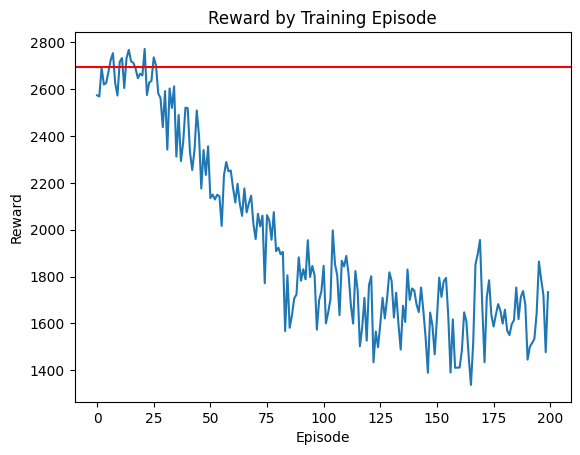

In [12]:
plt.title("Reward by Training Episode")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.plot(ending_ep_rewards)
plt.axhline(y=2695.57, color='r', linestyle='-')
plt.show()

In [14]:
test_stats = []
num_test_episodes = 15
print("========= Testing =========")

for episode in range(num_test_episodes):
    test_stats.append({
        "num_apples": [],
        "num_dirt": [],
        "pickers": [],
        "cleaners": [],
        "total_reward": 0,
    })

    states, info = env.reset()
    test_stats[-1]["num_apples"].append(info["apple"])
    test_stats[-1]["num_dirt"].append(info["dirt"])
    test_stats[-1]["pickers"].append(info["picker"])
    test_stats[-1]["cleaners"].append(info["cleaner"])

    #states = np.concatenate(list(states.values()), axis=0)
    state = states[agent_ids[0]]

    print(f"info: {info}")

    for step in tqdm(range(num_steps_per_epsiode)):
        actions_list = agentCoordinator.act(env)[0]
        actions = {agent_id: actions_list[i] for i, agent_id in enumerate(agent_ids)}
        next_states, rewards, dones, _, info = env.step(actions)
        test_stats[-1]["num_apples"].append(info["apple"])
        test_stats[-1]["num_dirt"].append(info["dirt"])
        test_stats[-1]["pickers"].append(info["picker"])
        test_stats[-1]["cleaners"].append(info["cleaner"])
        #next_states = np.concatenate(list(next_states.values()), axis=0)
        next_state = next_states[agent_ids[0]]
        reward = sum(rewards.values())
        #reward_graph.append(reward)

        if episode > verbose_episode:
            print(f"========= Step {step} =========")
            print(f"info: {info}")

        state = next_state

        if dones["__all__"]:
            break 

    print(f"ending info: {info}")
    #print(f"reward graph: {reward_graph}")
    print(f"========= End of Test =========")

    test_reward = info["total_apple_consumed"]

    test_stats[-1]["total_reward"] = test_reward

    print(test_reward)

========= Testing =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:06<00:00, 154.83it/s]


ending info: {'total_apple_consumed': 1600, 'step_apple_consumed': 4, 'apple': 33, 'dirt': 32, 'picker': 10, 'cleaner': 0, 'total_reward_by_agent': {'3': 164, '9': 171, '6': 159, '4': 168, '2': 148, '5': 155, '0': 142, '7': 168, '1': 150, '8': 175}}
========= End of Test =========
1600
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:06<00:00, 143.56it/s]


ending info: {'total_apple_consumed': 1748, 'step_apple_consumed': 2, 'apple': 26, 'dirt': 42, 'picker': 10, 'cleaner': 0, 'total_reward_by_agent': {'3': 180, '9': 168, '6': 177, '4': 194, '2': 161, '5': 159, '0': 159, '7': 194, '1': 170, '8': 186}}
========= End of Test =========
1748
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:06<00:00, 146.67it/s]


ending info: {'total_apple_consumed': 1648, 'step_apple_consumed': 2, 'apple': 30, 'dirt': 48, 'picker': 10, 'cleaner': 0, 'total_reward_by_agent': {'3': 162, '9': 190, '6': 172, '4': 153, '2': 162, '5': 151, '0': 142, '7': 178, '1': 164, '8': 174}}
========= End of Test =========
1648
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:06<00:00, 147.68it/s]


ending info: {'total_apple_consumed': 1752, 'step_apple_consumed': 0, 'apple': 26, 'dirt': 46, 'picker': 8, 'cleaner': 2, 'total_reward_by_agent': {'3': 148, '9': 204, '6': 187, '4': 179, '2': 155, '5': 191, '0': 145, '7': 206, '1': 154, '8': 183}}
========= End of Test =========
1752
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:06<00:00, 144.37it/s]


ending info: {'total_apple_consumed': 1709, 'step_apple_consumed': 0, 'apple': 33, 'dirt': 40, 'picker': 8, 'cleaner': 2, 'total_reward_by_agent': {'3': 146, '9': 195, '6': 192, '4': 186, '2': 155, '5': 176, '0': 145, '7': 170, '1': 153, '8': 191}}
========= End of Test =========
1709
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:06<00:00, 142.75it/s]


ending info: {'total_apple_consumed': 1762, 'step_apple_consumed': 1, 'apple': 28, 'dirt': 46, 'picker': 10, 'cleaner': 0, 'total_reward_by_agent': {'3': 184, '9': 201, '6': 158, '4': 162, '2': 149, '5': 176, '0': 181, '7': 163, '1': 168, '8': 220}}
========= End of Test =========
1762
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 141.83it/s]


ending info: {'total_apple_consumed': 1799, 'step_apple_consumed': 1, 'apple': 42, 'dirt': 37, 'picker': 10, 'cleaner': 0, 'total_reward_by_agent': {'3': 179, '9': 205, '6': 177, '4': 177, '2': 164, '5': 193, '0': 173, '7': 173, '1': 154, '8': 204}}
========= End of Test =========
1799
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:06<00:00, 152.31it/s]


ending info: {'total_apple_consumed': 1680, 'step_apple_consumed': 3, 'apple': 42, 'dirt': 37, 'picker': 10, 'cleaner': 0, 'total_reward_by_agent': {'3': 142, '9': 177, '6': 168, '4': 183, '2': 166, '5': 167, '0': 157, '7': 186, '1': 159, '8': 175}}
========= End of Test =========
1680
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:06<00:00, 146.19it/s]


ending info: {'total_apple_consumed': 1745, 'step_apple_consumed': 2, 'apple': 31, 'dirt': 42, 'picker': 10, 'cleaner': 0, 'total_reward_by_agent': {'3': 159, '9': 199, '6': 195, '4': 183, '2': 162, '5': 187, '0': 155, '7': 177, '1': 151, '8': 177}}
========= End of Test =========
1745
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:06<00:00, 147.08it/s]


ending info: {'total_apple_consumed': 1723, 'step_apple_consumed': 2, 'apple': 29, 'dirt': 46, 'picker': 10, 'cleaner': 0, 'total_reward_by_agent': {'3': 153, '9': 187, '6': 192, '4': 188, '2': 154, '5': 185, '0': 170, '7': 163, '1': 146, '8': 185}}
========= End of Test =========
1723
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 140.33it/s]


ending info: {'total_apple_consumed': 1655, 'step_apple_consumed': 2, 'apple': 39, 'dirt': 36, 'picker': 10, 'cleaner': 0, 'total_reward_by_agent': {'3': 143, '9': 177, '6': 177, '4': 163, '2': 146, '5': 175, '0': 168, '7': 169, '1': 146, '8': 191}}
========= End of Test =========
1655
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:06<00:00, 146.66it/s]


ending info: {'total_apple_consumed': 1778, 'step_apple_consumed': 2, 'apple': 43, 'dirt': 39, 'picker': 10, 'cleaner': 0, 'total_reward_by_agent': {'3': 151, '9': 214, '6': 211, '4': 183, '2': 171, '5': 180, '0': 169, '7': 179, '1': 150, '8': 170}}
========= End of Test =========
1778
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:06<00:00, 144.62it/s]


ending info: {'total_apple_consumed': 1582, 'step_apple_consumed': 1, 'apple': 29, 'dirt': 45, 'picker': 10, 'cleaner': 0, 'total_reward_by_agent': {'3': 157, '9': 171, '6': 160, '4': 162, '2': 157, '5': 169, '0': 125, '7': 177, '1': 130, '8': 174}}
========= End of Test =========
1582
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:06<00:00, 145.16it/s]


ending info: {'total_apple_consumed': 1765, 'step_apple_consumed': 0, 'apple': 32, 'dirt': 47, 'picker': 5, 'cleaner': 5, 'total_reward_by_agent': {'3': 154, '9': 200, '6': 185, '4': 175, '2': 173, '5': 179, '0': 162, '7': 179, '1': 160, '8': 198}}
========= End of Test =========
1765
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0, 'total_reward_by_agent': {'3': 0, '9': 0, '6': 0, '4': 0, '2': 0, '5': 0, '0': 0, '7': 0, '1': 0, '8': 0}}


100%|█████████▉| 999/1000 [00:07<00:00, 138.84it/s]

ending info: {'total_apple_consumed': 1820, 'step_apple_consumed': 4, 'apple': 31, 'dirt': 41, 'picker': 10, 'cleaner': 0, 'total_reward_by_agent': {'3': 181, '9': 200, '6': 195, '4': 179, '2': 182, '5': 171, '0': 186, '7': 162, '1': 177, '8': 187}}
========= End of Test =========
1820


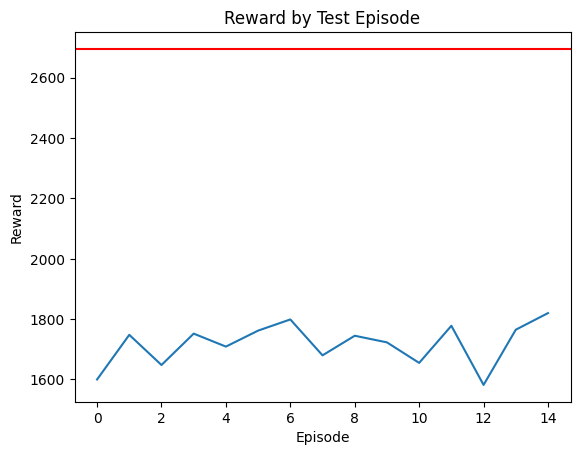

average reward 1717.7333333333333


In [15]:
plt.figure()
plt.title("Reward by Test Episode")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.plot([stat['total_reward'] for stat in test_stats])
plt.axhline(y=2695.57, color='r', linestyle='-')
plt.show()
print('average reward', np.mean([stat['total_reward'] for stat in test_stats]))

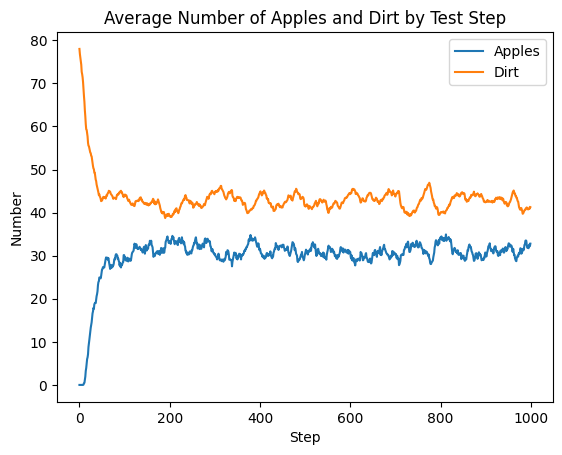

In [16]:
plt.figure()
plt.title("Average Number of Apples and Dirt by Test Step")
plt.xlabel("Step")
plt.ylabel("Number")
avg_num_apples = []
avg_num_dirt = []
for i in range(num_steps_per_epsiode):
    avg_num_apples.append(np.mean([stat['num_apples'][i] for stat in test_stats]))
    avg_num_dirt.append(np.mean([stat['num_dirt'][i] for stat in test_stats]))
plt.plot(avg_num_apples, label="Apples")
plt.plot(avg_num_dirt, label="Dirt")
plt.legend()
plt.show()

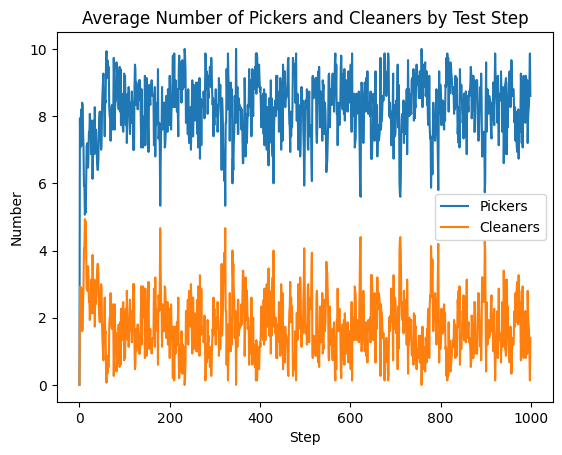

In [17]:
plt.figure()
plt.title("Average Number of Pickers and Cleaners by Test Step")
plt.xlabel("Step")
plt.ylabel("Number")
avg_num_pickers = []
avg_num_cleaners = []
for i in range(num_steps_per_epsiode):
    avg_num_pickers.append(np.mean([stat['pickers'][i] for stat in test_stats]))
    avg_num_cleaners.append(np.mean([stat['cleaners'][i] for stat in test_stats]))
plt.plot(avg_num_pickers, label="Pickers")
plt.plot(avg_num_cleaners, label="Cleaners")
plt.legend()
plt.show()

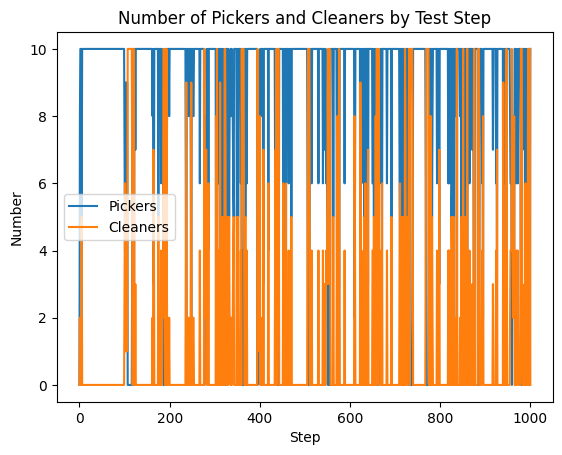

In [18]:
plt.figure()
plt.title("Number of Pickers and Cleaners by Test Step")
plt.xlabel("Step")
plt.ylabel("Number")
episode = test_stats[0]
plt.plot(episode['pickers'], label="Pickers")
plt.plot(episode['cleaners'], label="Cleaners")
plt.legend()
plt.show()

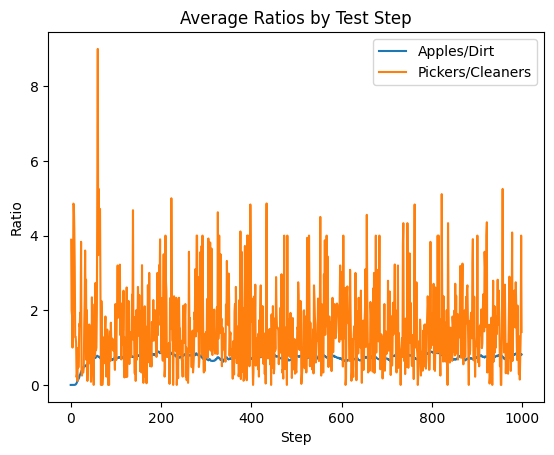

In [19]:
plt.figure()
plt.title("Average Ratios by Test Step")
plt.xlabel("Step")
plt.ylabel("Ratio")
avg_apple_dirt_ratios = []
apple_dirt_steps = []
avg_picker_cleaner_ratios = []
picker_cleaner_steps = []
for i in range(num_steps_per_epsiode):
    #avg_apple_dirt_ratios.append(np.mean([stat['num_apples'][i] / (stat['num_dirt'][i] + 1e-8) for stat in test_stats]))
    #avg_picker_cleaner_ratios.append(np.mean([stat['pickers'][i] / (stat['cleaners'][i]) for stat in test_stats if stat['cleaners'][i] > 0]))
    apple_dirt = []
    picker_cleaner = []
    for stat in test_stats:
        if stat['num_dirt'][i] > 0:
            apple_dirt.append(stat['num_apples'][i] / stat['num_dirt'][i])
        if stat['cleaners'][i] > 0:
            picker_cleaner.append(stat['pickers'][i] / stat['cleaners'][i])
    if len(apple_dirt) > 0:
        avg_apple_dirt_ratios.append(np.mean(apple_dirt))
        apple_dirt_steps.append(i)
    if len(picker_cleaner) > 0:
        avg_picker_cleaner_ratios.append(np.mean(picker_cleaner))
        picker_cleaner_steps.append(i)

plt.plot(apple_dirt_steps, avg_apple_dirt_ratios, label="Apples/Dirt")
plt.plot(picker_cleaner_steps, avg_picker_cleaner_ratios, label="Pickers/Cleaners")
plt.legend()
plt.show()